## Task : Text Generation

**Description:** You are given a dataset of tweets from a particular user. Your task is to build a machine learning model to generate new tweets based on the user's existing tweets.

**Dataset:** "Sentiment140 dataset" available on [Kaggle](https://www.kaggle.com/kazanova/sentiment140)

**Requirements:**
* Use Python programming language to build your model
* Use natural language processing techniques to preprocess the data (e.g. remove stop words, punctuation, and perform stemming/lemmatization)
* Use a machine learning algorithm of your choice to train the model
* Implement a text generation algorithm that takes a seed sentence as input and generates a new tweet based on the patterns learned from the existing tweets
* Evaluate the performance of the text generation algorithm using human evaluation and/or automatic evaluation metrics (e.g. perplexity, BLEU score, or ROUGE score)

**Deliverables:**
* A Jupyter notebook with your Python code and the results of your analysis
* A brief report explaining your approach and discussing the results



## Step-0: Installing The Required Libraries

In [1]:
!pip install nltk;
!pip install opendatasets;

## Step-1: Importing Libraries

In [2]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import opendatasets as od
import os

In [3]:
# Download the necessary NLTK data (only needs to be done once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Step-2: Loding The Dataset

In [4]:
# Downloding the dataset:
data=od.download('https://www.kaggle.com/datasets/kazanova/sentiment140')

Skipping, found downloaded files in "./sentiment140" (use force=True to force download)


In [5]:
#Loading the datasets
df=pd.read_csv('sentiment140/training.1600000.processed.noemoticon.csv', header=None, names=['target', 'ids', 'datetime', 'flag', 'user','tweet'], encoding='latin-1')

## Step-3: Viewing The Dataset

In [6]:
df.head(5)

,target,ids,datetime,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
# Let's see the missing values
df.isnull().sum().sum()

0

In [8]:
# Let's count the positive and negative tweets
df['target']=df['target'].replace({4:1})

In [9]:
df.target.value_counts()

0    800000
1    800000
Name: target, dtype: int64

### Conclusion: 
* Here we can see the tweets are balanced.
* 80k tweets are positive (1) and 80k tweets are negative (0).

### Decisions:
* Since our task is to build a *Text Generation Model*. So I'm Just going to take the tweets column.
* Now in the tweet column there is texts so I need to preprocess them.
* But it's 1.6 Million tweets so I am going to build a function to do all the needed steps.

## Step-4: Tweets Preprocess function

In [10]:
# Define the set of stop words
stop_words = set(stopwords.words('english'))


In [11]:
# Create a stemmer and lemmatizer object
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [12]:
# Define a function to preprocess a single tweet
def preprocess_tweet(tweet):
    # Remove URLs, user mentions, and special characters from the tweet
    tweet = re.sub(r"http\S+|www\S+|https\S+|@\S+|[^\w\s]", '', tweet)
    # Tokenize the tweet into words
    words = word_tokenize(tweet)
    # Remove stop words and punctuation
    words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]
    # Perform stemming or lemmatization
    words = [stemmer.stem(word) for word in words]  # or lemmatizer.lemmatize(word) for word in words]
    # Join the words back into a single string
    tweet = ' '.join(words)
    return tweet

In [13]:
# Apply the preprocessing function to each tweet
df['processed_tweet'] = df['tweet'].apply(preprocess_tweet)

In [14]:
# Display the preprocessed dataset
df.head()

,target,ids,datetime,flag,user,tweet,processed_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",that bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant updat facebook text might cri resul...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behav im mad cant see


## Step-5: Data Exploration and Visualization
After pre-processing your tweet dataset, you can use various data exploration and visualization techniques to gain insights into the data.

#### 1. Frequency Analysis:
Let's analyze the frequency of individual words or phrases in the dataset using Python's Counter object from the collections module. 

In [15]:
# Let's import the module
from collections import Counter

In [16]:
# Create a Counter object to count the frequency of each word
word_freq = Counter()
for tweet in df['processed_tweet']:
    word_freq.update(tweet.split())

In [17]:
# Print the 10 most common words
print(word_freq.most_common(10))

[('im', 177512), ('go', 137040), ('get', 109956), ('day', 101292), ('good', 90551), ('work', 85194), ('like', 82962), ('love', 81080), ('got', 70036), ('dont', 66932)]


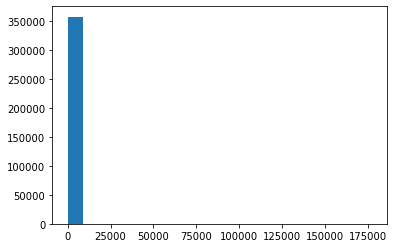

In [18]:
# Plot a histogram of the word frequencies
plt.hist(word_freq.values(), bins=20)
plt.show()

#### 2. Topic Modeling:
Let's use topic modeling techniques such as Latent Dirichlet Allocation (LDA) to identify the main topics in the dataset. 

In [19]:
# Importing the required libraries
# import sklearn
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

In [20]:
# Vectorize the preprocessed tweets using a CountVectorizer
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# tweet_vectors = vectorizer.fit_transform(df['processed_tweet'])


In [21]:
# Create an LDA model and fit it to the tweet vectors
# lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
# lda_model.fit(tweet_vectors)

In [22]:
# Print the top 10 words for each topic
# for i, topic in enumerate(lda_model.components_):
#     print(f"Topic {i+1}:")
#     print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])
#     print()

In [8]:
!pip install tensorflow

     |████████████████████████████████| 585.9 MB 3.7 MB/s eta 0:00:01  ██                   | 236.3 MB 56.6 MB/s eta 0:00:07 

In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Preprocess the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tweet'])
total_words = len(tokenizer.word_index) + 1

In [ ]:
# Convert text to sequences
input_sequences = []
for line in df['tweet']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
# Split input and output
xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]

In [ ]:
# Convert labels to categorical
ys = pd.get_dummies(labels).values

In [ ]:
# Build the model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')


In [ ]:
# Train the model
model.fit(xs, ys, epochs=10, verbose=1)

In [ ]:
# Generate new tweets
seed_text = "I love"
next_words = 10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)